In [706]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [707]:
data = pd.read_csv("Company_Data.csv")

In [708]:
pd.set_option("display.max_rows",None)
data 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [709]:
data.shape

(400, 11)

In [710]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [711]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [712]:
data.describe

<bound method NDFrame.describe of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
5    10.81        124     113           13         501     72       Bad   78   
6     6.63        115     105            0          45    108    Medium   71   
7    11.85        136      81           15         425    120      Good   67   
8     6.54        132     110            0         108    124    Medium   76   
9     4.69        132     113            0         131    124    Medium   76   
10    9.01        121      78            9         150    100       Bad   26   
11   1

In [713]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [714]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [715]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [716]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


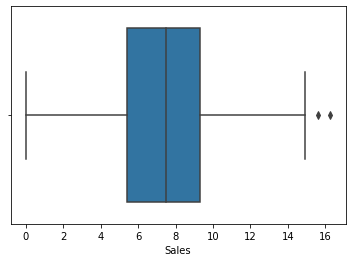

In [717]:
ax = sns.boxplot(data['Sales'])

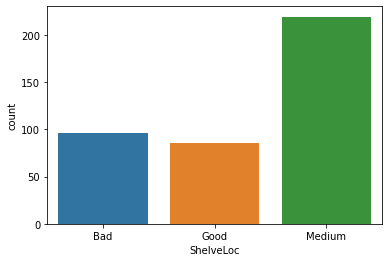

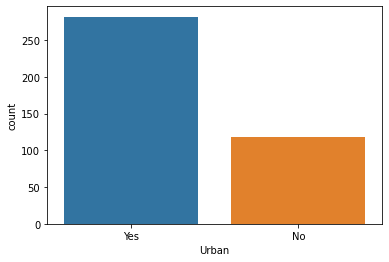

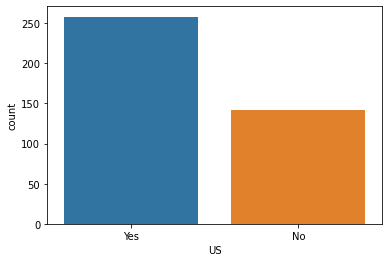

In [718]:
sns.countplot(data['ShelveLoc'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

sns.countplot(data['US'])
plt.show()

In [719]:
data.Sales = pd.cut(x=data.Sales , bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
data.Sales

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
5      Medium
6      Medium
7      Medium
8      Medium
9         Low
10     Medium
11     Medium
12        Low
13     Medium
14     Medium
15     Medium
16     Medium
17       High
18       High
19     Medium
20     Medium
21       High
22        Low
23        Low
24     Medium
25       High
26     Medium
27        Low
28        Low
29     Medium
30       High
31     Medium
32     Medium
33     Medium
34        Low
35     Medium
36     Medium
37        Low
38     Medium
39        Low
40        Low
41     Medium
42     Medium
43        Low
44        Low
45        Low
46       High
47        Low
48        Low
49     Medium
50        Low
51        Low
52     Medium
53     Medium
54        Low
55     Medium
56     Medium
57        Low
58        Low
59        Low
60     Medium
61     Medium
62        Low
63     Medium
64     Medium
65        Low
66     Medium
67     Medium
68       High
69     Medium
70     Medium
71    

<AxesSubplot:xlabel='Sales', ylabel='count'>

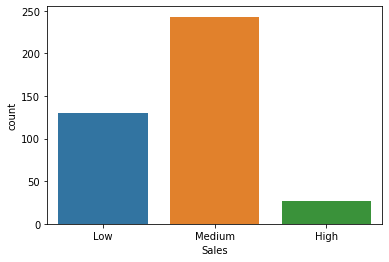

In [720]:
sns.countplot(data.Sales)

In [721]:
data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [722]:
# Converting other attributes into categories
data['CompPrice'] = pd.cut(x=data['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

data['Income'] = pd.cut(x=data['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

data['Advertising'] = pd.cut(x=data['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

data['Population'] = pd.cut(x=data['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

data['Price'] = pd.cut(x=data['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

data['Age'] = pd.cut(x=data['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

data['Education'] = pd.cut(x=data['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [723]:
data 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,High,Medium,Bad,Low,Medium,Yes,No
5,Medium,Medium,High,Medium,High,Low,Bad,High,High,No,Yes
6,Medium,Medium,High,Low,Low,Medium,Medium,High,High,Yes,No
7,Medium,High,High,Medium,High,Medium,Good,High,Low,Yes,Yes
8,Medium,Medium,High,Low,Low,Medium,Medium,High,Low,No,No
9,Low,Medium,High,Low,Low,Medium,Medium,High,High,No,Yes


In [724]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['Sales'] = label_encoder.fit_transform(data['Sales'])
data['CompPrice'] = label_encoder.fit_transform(data['CompPrice'])
data['Income'] = label_encoder.fit_transform(data['Income'])
data['Advertising'] = label_encoder.fit_transform(data['Advertising'])
data['Population'] = label_encoder.fit_transform(data['Population'])
data['Price'] = label_encoder.fit_transform(data['Price'])
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Age'] = label_encoder.fit_transform(data['Age'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])


In [725]:
data 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
5,2,2,0,2,0,1,0,0,0,0,1
6,2,2,0,1,1,2,2,0,0,1,0
7,2,0,0,2,0,2,1,0,1,1,1
8,2,2,0,1,1,2,2,0,1,0,0
9,1,2,0,1,1,2,2,0,0,0,1


In [726]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.072262,-0.011800,0.084403,0.059900,0.118394,0.167722,0.032237,-0.015480,0.015228,0.014175
CompPrice,0.072262,1.000000,-0.067776,0.023890,-0.099953,0.283602,-0.032907,-0.020228,0.061327,-0.080875,-0.022295
Income,-0.011800,-0.067776,1.000000,0.022482,0.077719,-0.031260,0.035383,0.096848,-0.023920,-0.037049,-0.037854
Advertising,0.084403,0.023890,0.022482,1.000000,0.042640,0.066699,0.050442,-0.025986,-0.027225,-0.045881,0.425591
Population,0.059900,-0.099953,0.077719,0.042640,1.000000,-0.001096,0.008897,-0.023286,0.004790,0.076840,0.001007
Price,0.118394,0.283602,-0.031260,0.066699,-0.001096,1.000000,-0.002225,0.038107,0.040300,0.004418,0.039251
ShelveLoc,0.167722,-0.032907,0.035383,0.050442,0.008897,-0.002225,1.000000,0.016673,-0.022060,-0.063978,-0.039760
Age,0.032237,-0.020228,0.096848,-0.025986,-0.023286,0.038107,0.016673,1.000000,0.018913,-0.052661,0.063224
Education,-0.015480,0.061327,-0.023920,-0.027225,0.004790,0.040300,-0.022060,0.018913,1.000000,-0.001823,0.030013
Urban,0.015228,-0.080875,-0.037049,-0.045881,0.076840,0.004418,-0.063978,-0.052661,-0.001823,1.000000,0.047085


In [727]:
# Dividing data into independent variables and dependent variable
x = data.iloc[:,1:]
y = data['Sales']

In [728]:
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,2,2,2,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,0,2,0,1,2,1,0
5,2,0,2,0,1,0,0,0,0,1
6,2,0,1,1,2,2,0,0,1,0
7,0,0,2,0,2,1,0,1,1,1
8,2,0,1,1,2,2,0,1,0,0
9,2,0,1,1,2,2,0,0,0,1


In [729]:
y 

0      2
1      2
2      2
3      2
4      1
5      2
6      2
7      2
8      2
9      1
10     2
11     2
12     1
13     2
14     2
15     2
16     2
17     0
18     0
19     2
20     2
21     0
22     1
23     1
24     2
25     0
26     2
27     1
28     1
29     2
30     0
31     2
32     2
33     2
34     1
35     2
36     2
37     1
38     2
39     1
40     1
41     2
42     2
43     1
44     1
45     1
46     0
47     1
48     1
49     2
50     1
51     1
52     2
53     2
54     1
55     2
56     2
57     1
58     1
59     1
60     2
61     2
62     1
63     2
64     2
65     1
66     2
67     2
68     0
69     2
70     2
71     2
72     1
73     0
74     2
75     2
76     2
77     2
78     1
79     2
80     2
81     2
82     2
83     1
84     1
85     2
86     2
87     2
88     2
89     2
90     1
91     1
92     1
93     2
94     2
95     1
96     2
97     2
98     0
99     1
100    1
101    2
102    1
103    1
104    1
105    1
106    1
107    2
108    1
109    2
110    2
1

In [730]:
data["Sales"].unique()

array([2, 1, 0])

In [731]:
#0 means High, 1 means Low, 2 means Medium
data.Sales.value_counts() 

2    243
1    130
0     27
Name: Sales, dtype: int64

In [732]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [733]:
# Splitting data into training to 80% and testing to 20% in data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [734]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
85,2,0,1,2,2,2,2,2,0,0
69,2,2,1,2,2,2,0,1,1,0
203,2,0,1,1,0,0,1,2,1,0
379,2,0,1,0,2,0,2,0,1,0
261,2,1,1,2,2,2,2,0,1,1
287,1,1,1,2,1,0,1,0,1,1
293,2,0,1,1,2,1,2,1,1,0
217,2,1,1,0,2,2,0,2,0,0
0,0,0,2,2,2,0,1,0,1,1
323,2,0,2,0,2,2,1,1,1,1


In [735]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,2,0,1,2,0,1,0,1,1,1
390,2,0,1,1,2,2,0,1,1,1
310,0,2,0,0,0,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
248,2,2,1,1,2,2,0,1,1,1
256,0,1,1,2,0,2,0,1,1,0
254,2,0,0,0,2,1,1,0,1,1
42,1,2,1,1,1,2,2,0,1,0
371,0,0,1,2,2,2,2,0,1,0
292,2,2,2,2,1,1,0,0,1,1


In [736]:
y_train

85     2
69     2
203    1
379    1
261    1
287    2
293    2
217    1
0      2
323    2
284    2
265    1
294    0
331    2
20     2
27     1
183    1
157    2
129    1
279    1
189    0
396    2
299    2
347    2
282    2
174    1
278    2
204    2
185    2
333    1
100    1
372    2
139    0
187    2
173    2
381    1
53     2
229    2
303    2
37     1
389    2
21     0
142    2
163    1
382    1
88     2
90     1
215    1
314    2
259    1
49     2
227    2
290    2
336    1
212    0
296    2
10     2
275    2
28     1
301    2
39     1
244    2
252    2
11     2
320    1
266    2
267    1
151    2
295    1
221    2
376    0
52     2
318    2
182    1
103    1
288    2
363    2
40     1
47     1
59     1
16     2
255    2
243    2
309    2
316    0
200    1
195    1
86     2
29     2
335    2
225    2
46     0
385    1
208    2
257    2
144    2
14     2
285    2
92     1
388    2
170    2
253    1
17     0
120    2
319    2
321    2
44     1
272    0
136    1
269    1
198    1
5

In [737]:
y_test

132    2
390    1
310    2
3      2
248    1
256    1
254    2
42     2
371    2
292    2
345    1
160    1
286    2
291    2
147    2
48     1
135    2
118    2
9      1
354    1
380    2
177    2
240    2
172    2
43     1
65     1
26     2
4      1
126    2
232    0
18     0
238    2
169    2
194    2
356    1
56     2
322    2
141    2
140    2
274    2
166    2
146    1
161    1
66     2
102    1
246    2
133    2
6      2
137    2
222    2
106    1
375    2
353    2
192    2
228    1
368    2
351    2
167    2
258    1
62     1
12     1
223    1
357    0
168    2
51     1
152    2
112    2
162    1
391    2
13     2
77     2
350    2
341    2
175    2
188    2
361    2
197    1
23     1
54     1
58     1
Name: Sales, dtype: int32

## Building Decision Tree Classifier using Entropy Criteria

In [738]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

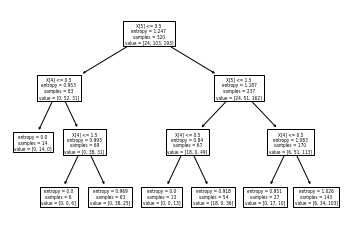

In [739]:
#PLot the decision tree
tree.plot_tree(model);

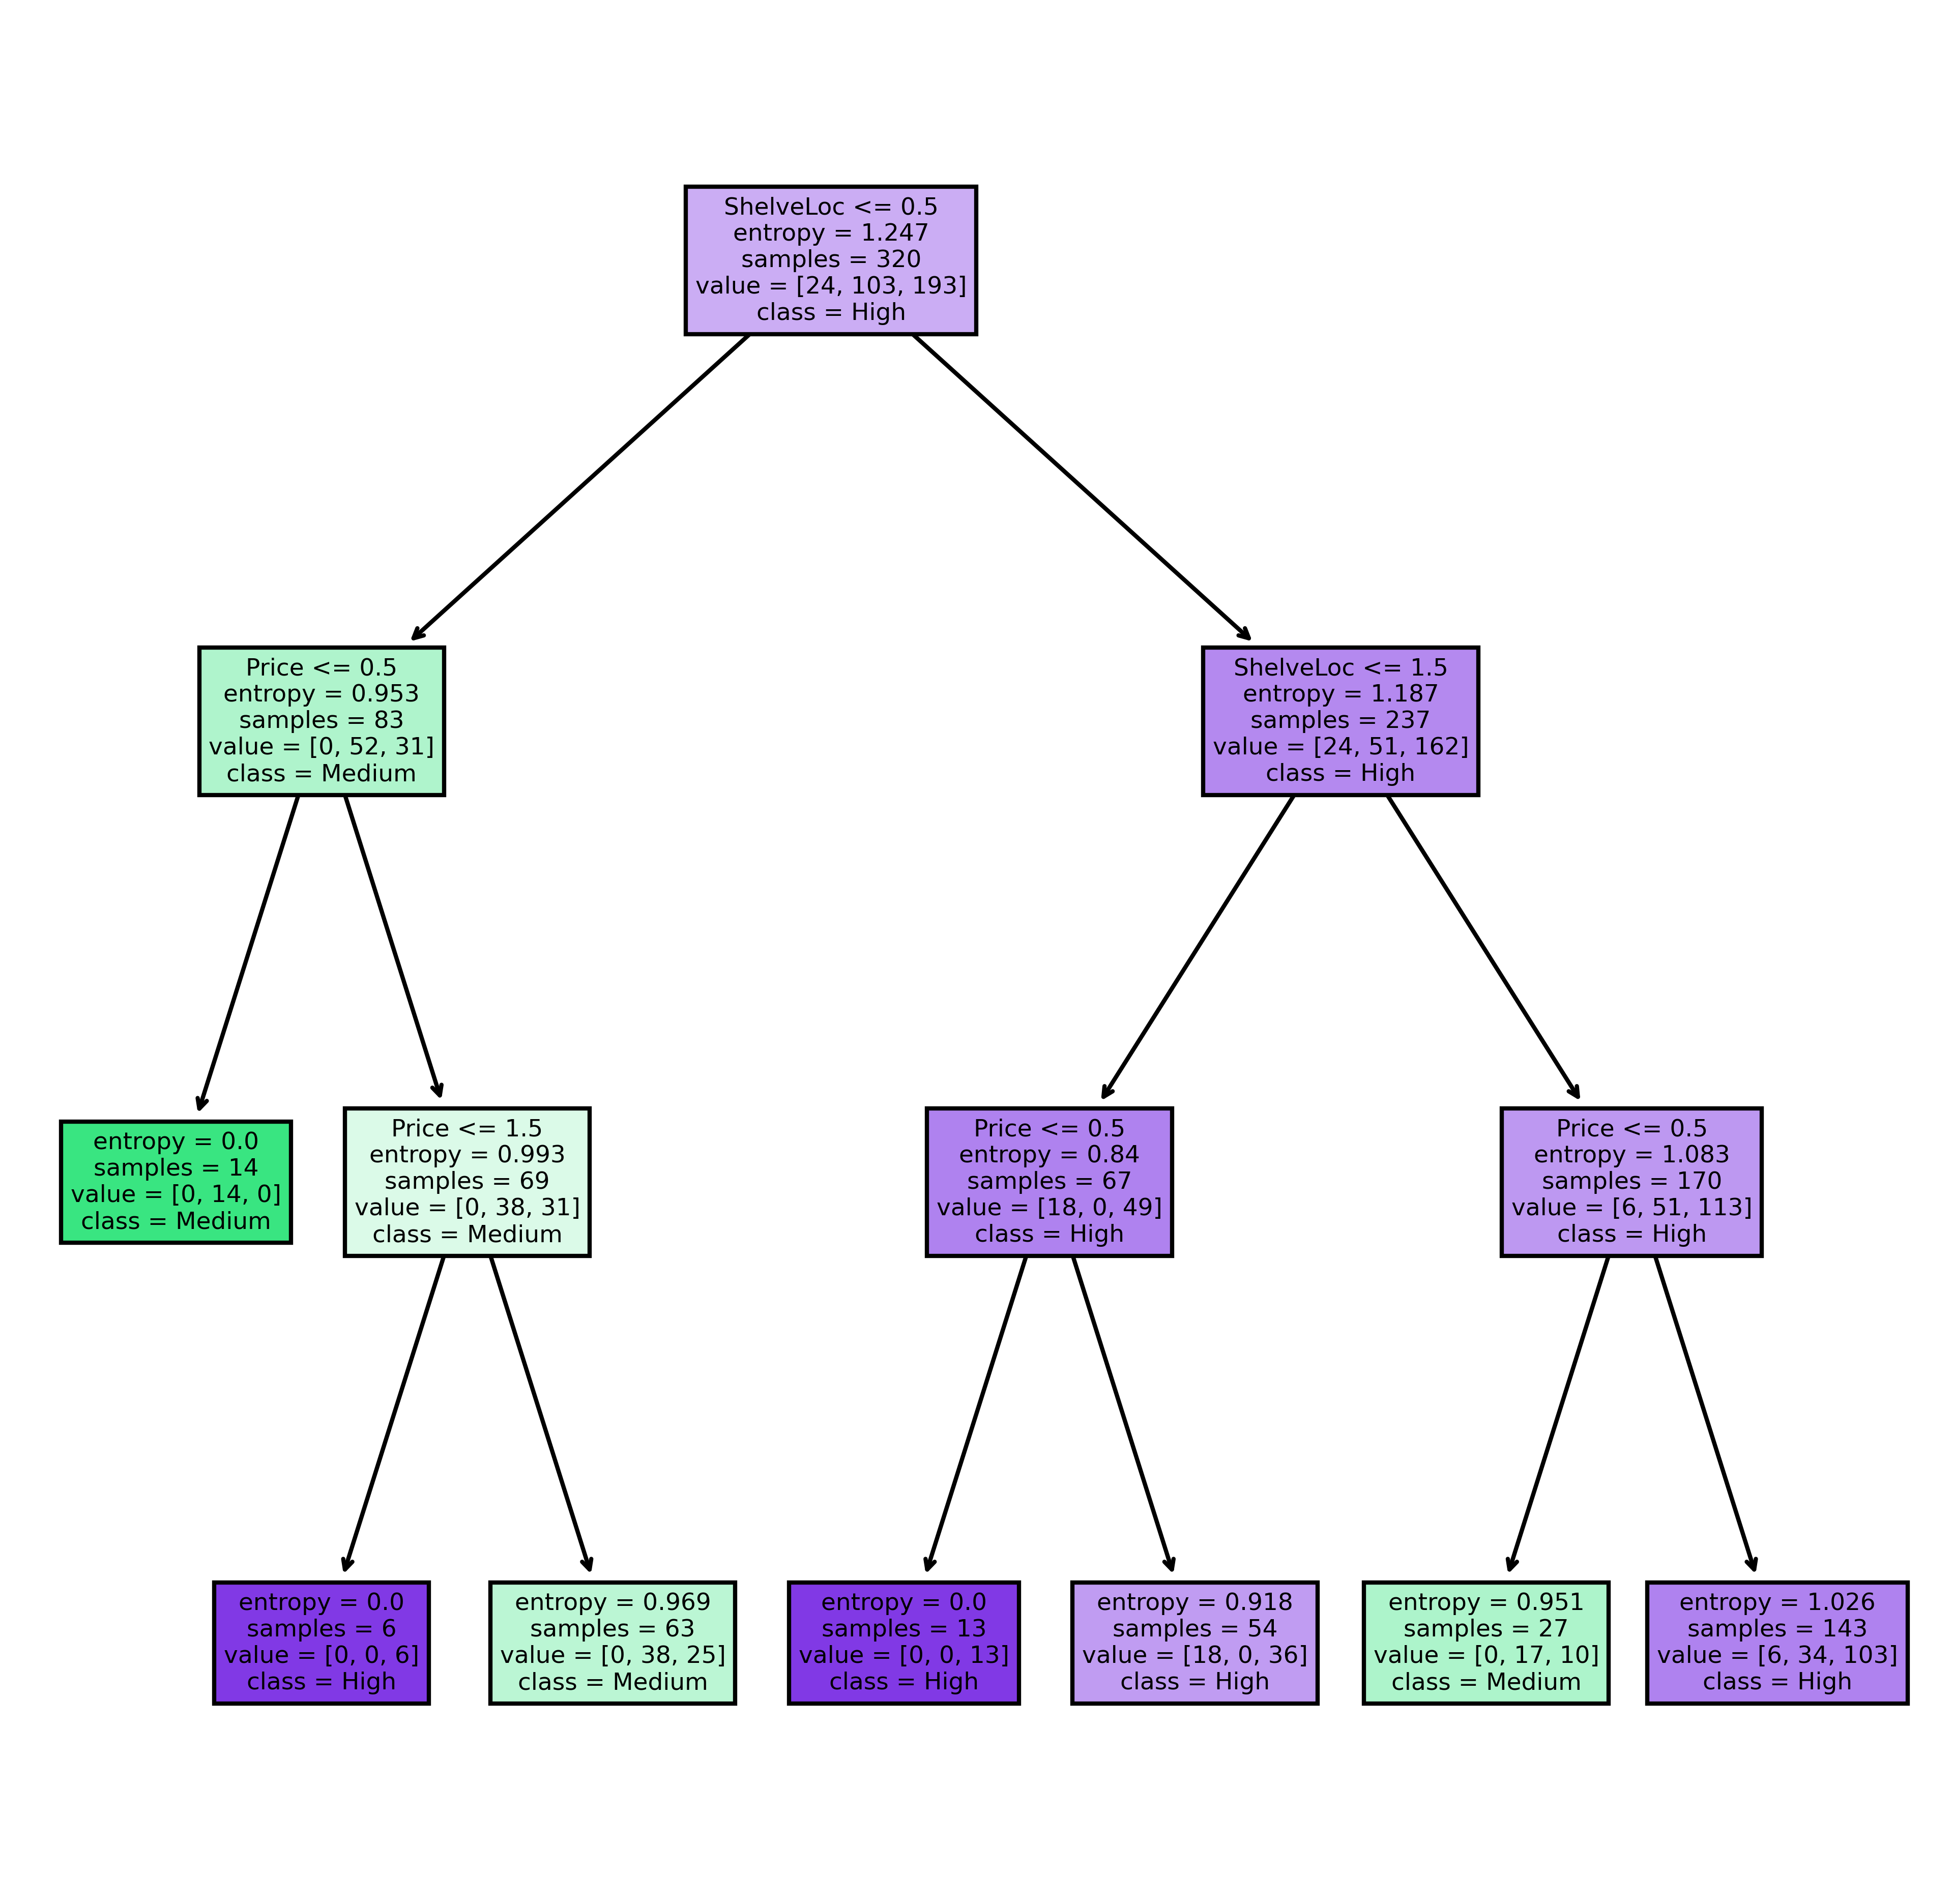

In [740]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [741]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.31484447,
       0.68515553, 0.        , 0.        , 0.        , 0.        ])

In [742]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

ShelveLoc      0.685156
Price          0.314844
CompPrice      0.000000
Income         0.000000
Advertising    0.000000
Population     0.000000
Age            0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

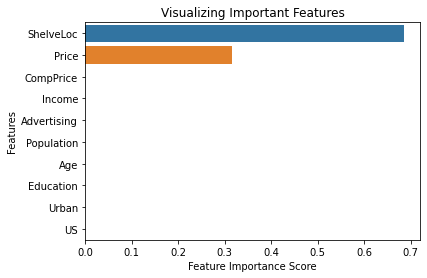

In [743]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [744]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    56
1    24
dtype: int64

In [745]:
preds

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1])

In [746]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2
Sales,,
0,0,3
1,16,11
2,8,42


In [747]:
# Accuracy 
np.mean(preds==y_test)

0.725

## Building Decision Tree Classifier (CART) using Gini Criteria

In [748]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [749]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [750]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.725

In [751]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.31484447,
       0.68515553, 0.        , 0.        , 0.        , 0.        ])

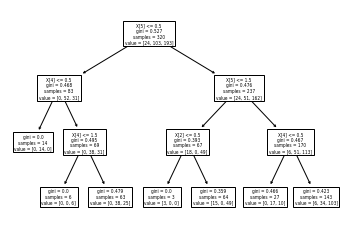

In [752]:
# Plotting Decision tree
tree.plot_tree(model_gini);

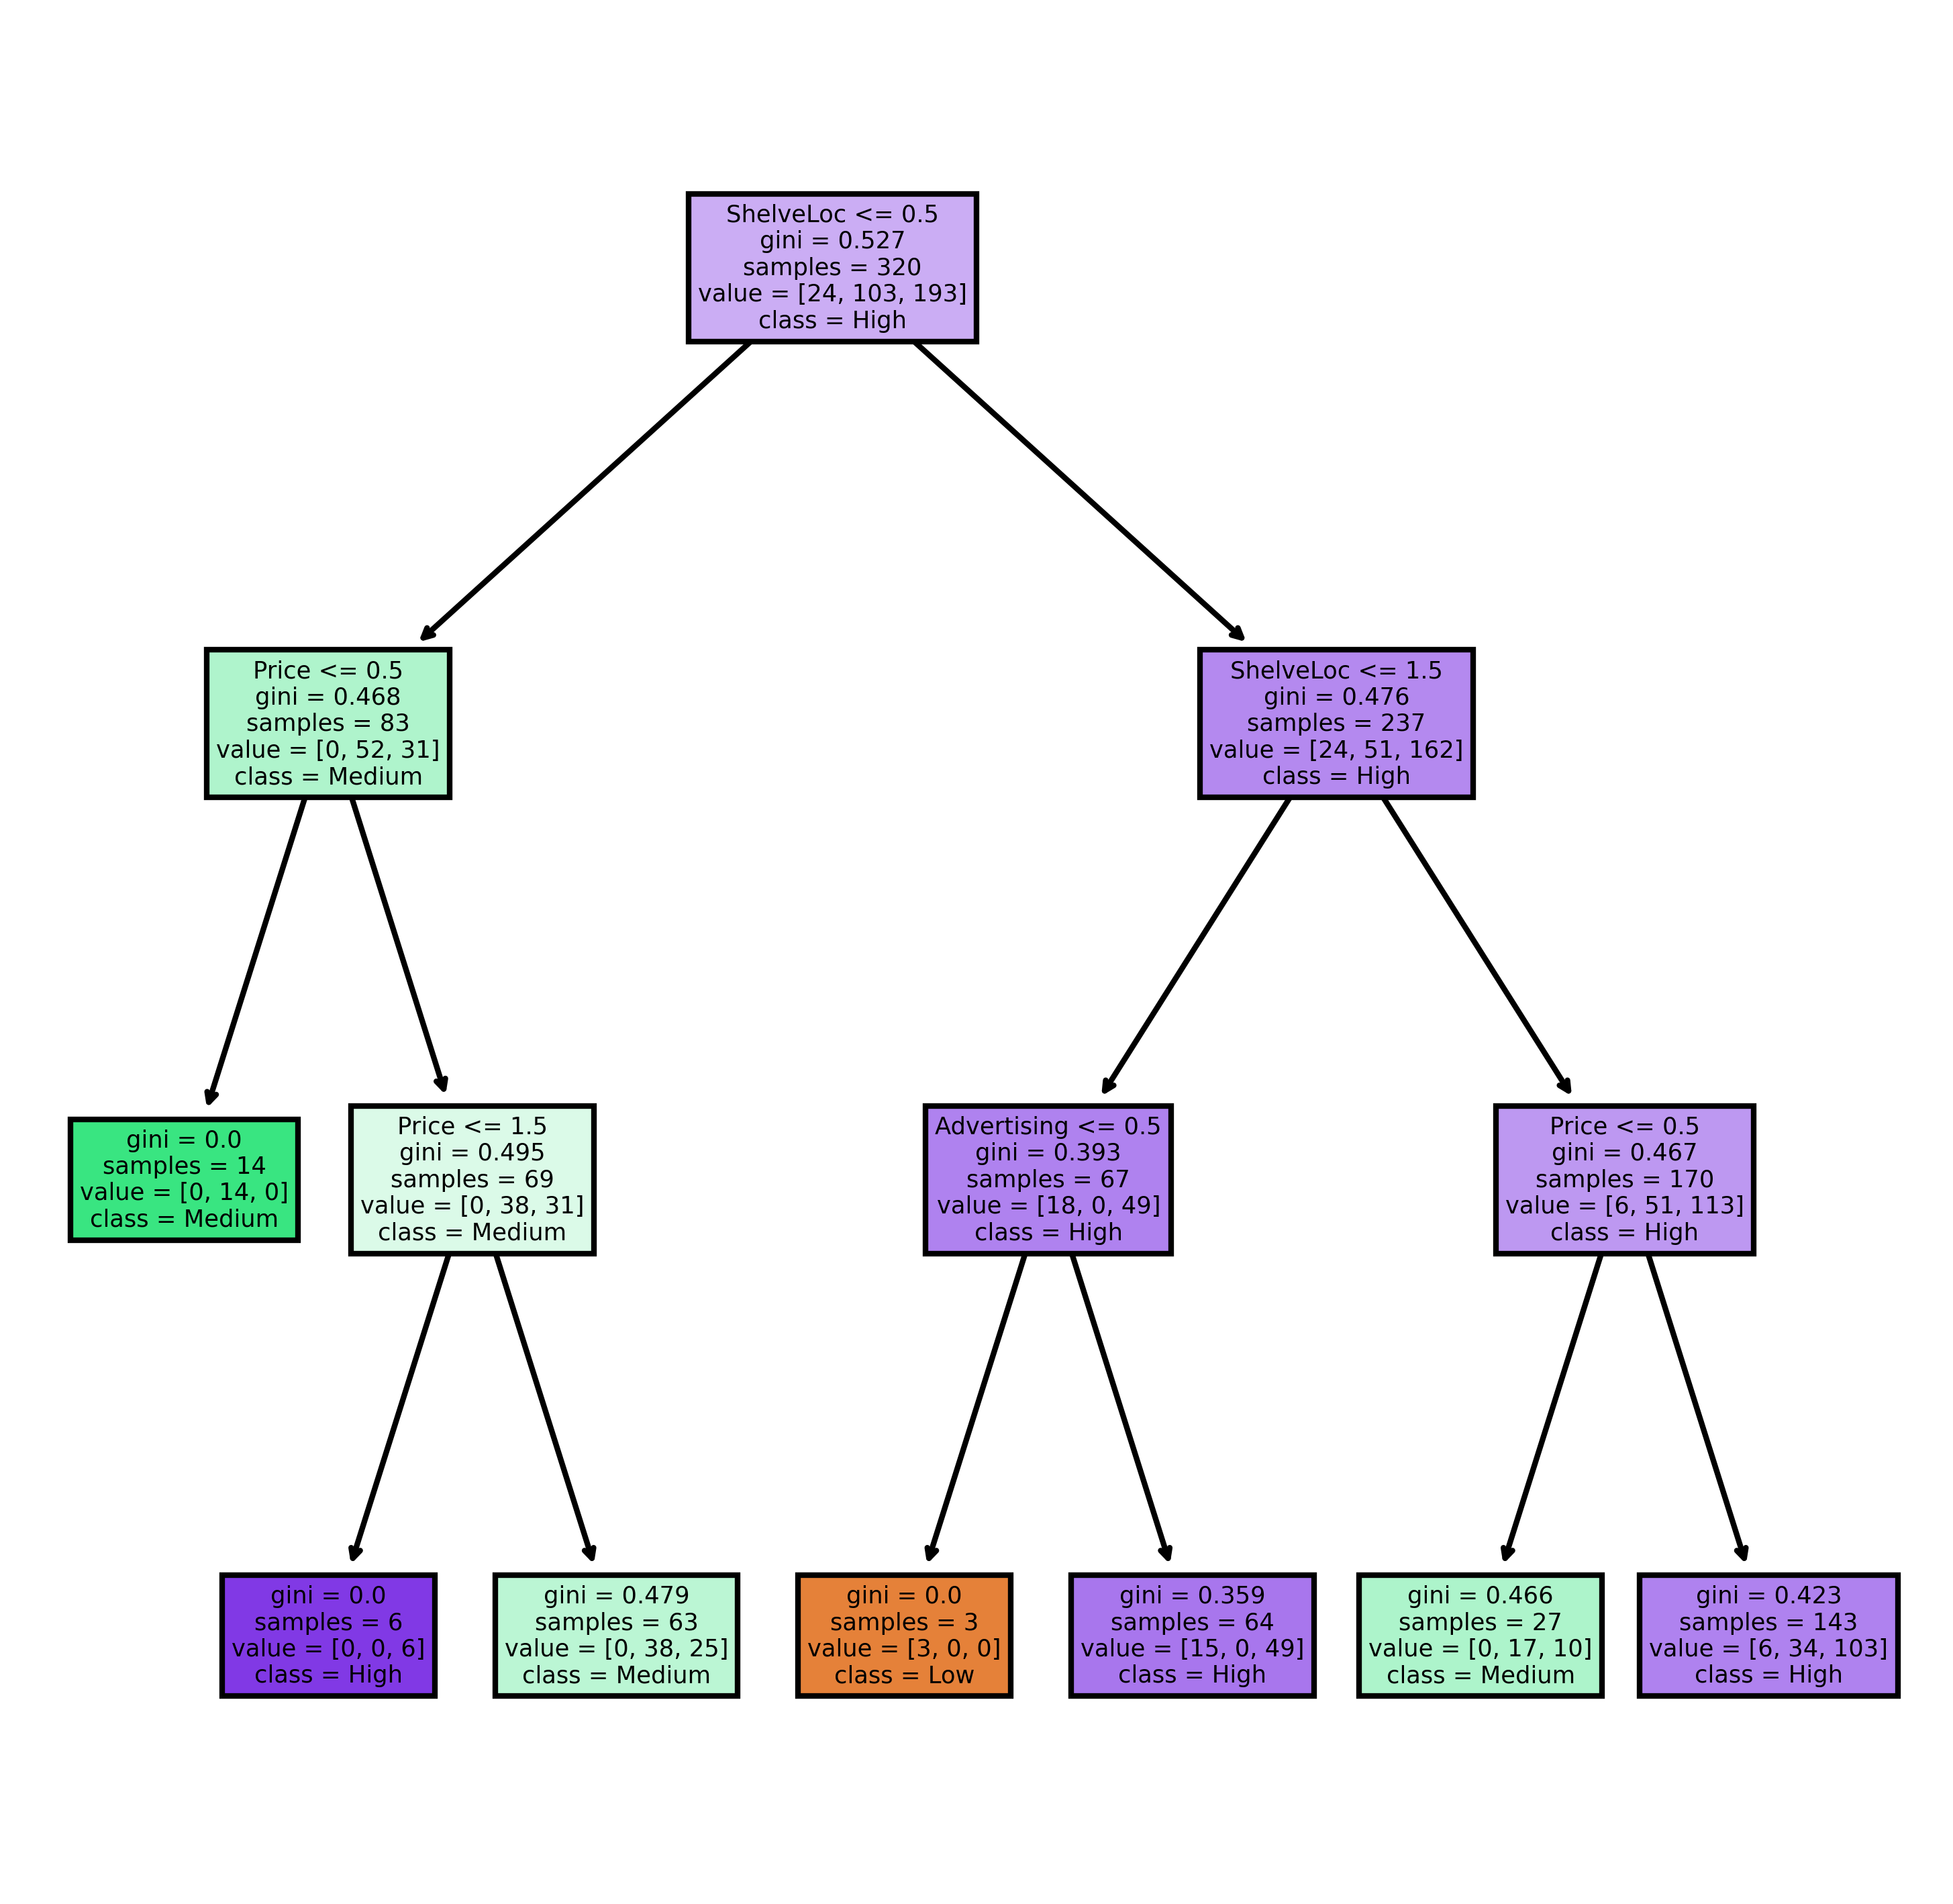

In [753]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [754]:
# Predicting Data
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

2    55
1    24
0     1
dtype: int64

In [755]:
preds

array([2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1])

In [756]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,0,0,3
1,0,16,11
2,1,8,41


In [757]:
# Checking accuracy of model
model_gini.score(x_test, y_test)

0.7125